Text(0,0.5,'Stezenie, g/L')

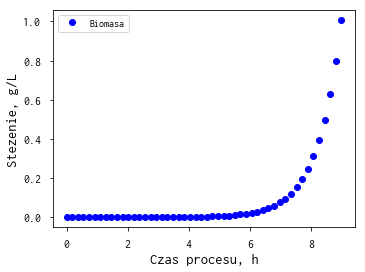

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from scipy.integrate import odeint

# https://www.youtube.com/watch?v=39kf7YdwNOs


def model(y, t):
    
    # stężenie komórek E.coli
    Cc = y[0]
    # stężenie substratu (glukoza)
    Cs = y[1]

    mi_max = 1.3 # 1/h
    Ks = 2.2e-3 # g/L
    
    # stała szykości umierania
    kd = 0.02 # 1/h
    
    # 1komórka waży 1ng
    
    # szybkość wzrostu komórek (model Monoda)
    rg = (mi_max*Cc*Cs)/(Ks + Cs)
    
    # szybkość obumierania komórek
    rd = kd*Cc
    
    #model kinetyczny
    dCcdt = rg - rd
    dCsdt = -rg
    return [dCcdt, dCsdt]


# początkowo 10000 komórek/L
# 100 g/L glukozy
# docelowo 400 000 000 komórek/L

Cc0 = 10000 * 1e-9 # g/L biomasy
Ccend = 400000000 * 1e-9 # g/L biomasy => 0.4
Cs0 = 100 # g/L glukozy

initial = [Cc0, Cs0]

# czas w godzinach
t = numpy.linspace(0, 9)

res = odeint( model, initial, t )
Cc = res[:,0]
Cs = res[:,1]

plt.plot(t,Cc,'bo', label='Biomasa')
#plt.plot(t,Cs,'ro', label='Glukoza')
plt.legend()
plt.xlabel('Czas procesu, h')
plt.ylabel('Stezenie, g/L')

In [64]:
Cc

array([1.00000000e-05, 1.26557745e-05, 1.60152339e-05, 2.02567928e-05,
       2.56292893e-05, 3.24272635e-05, 4.10278606e-05, 5.19105507e-05,
       6.56821733e-05, 8.30954701e-05, 1.05128183e-04, 1.33003181e-04,
       1.68269140e-04, 2.12872626e-04, 2.69304978e-04, 3.40698280e-04,
       4.30991113e-04, 5.45215323e-04, 6.89721808e-04, 8.72526532e-04,
       1.10378224e-03, 1.39632058e-03, 1.76638386e-03, 2.23453698e-03,
       2.82676679e-03, 3.57595560e-03, 4.52370585e-03, 5.72264224e-03,
       7.23932041e-03, 9.15797583e-03, 1.15851364e-02, 1.46555738e-02,
       1.85397765e-02, 2.34533976e-02, 2.96692933e-02, 3.75325940e-02,
       4.74799201e-02, 6.00636034e-02, 7.59823392e-02, 9.61200429e-02,
       1.21594871e-01, 1.53821330e-01, 1.94588809e-01, 2.46160926e-01,
       3.11401268e-01, 3.93932337e-01, 4.98336684e-01, 6.30411437e-01,
       7.97490114e-01, 1.00884984e+00])

In [80]:
# inny sposób rozwiązania ...

initial = [Cc0, Cs0]


time_range = np.linspace(0,10,1000)
for t in time_range:
    
    res = odeint( model, initial, [0,t])
    Cc = res[1,0]
    Cs = res[1,1]
    if np.abs(Cc-0.4)<0.001:
        print(t, Cc)

8.278278278278279 0.4007582957255633
